In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv(os.path.join("data/HeartData.csv"))
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
target = df["DEATH_EVENT"]
target_names = ["Negative", "Positive"]

In [4]:
data = df.drop("DEATH_EVENT", axis=1)
# heartdata = data.drop("time", axis=1)
feature_names = data.columns
# heartdata.head()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=630)

# Decision Tree:

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
DTA = (clf.score(X_test, y_test) * 100)
DTA

82.66666666666667

In [7]:
clf

DecisionTreeClassifier()

Decision Tree Confusion matrix, without normalization
[[52  7]
 [ 6 10]]
Decision Tree Normalized confusion matrix
[[0.88 0.12]
 [0.38 0.62]]


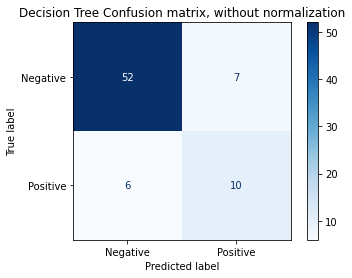

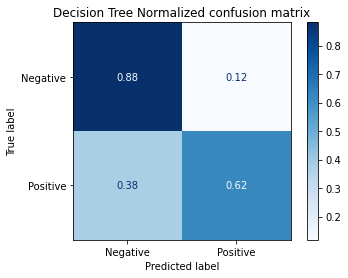

In [8]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Decision Tree Confusion matrix, without normalization", None),
                  ("Decision Tree Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Random Forrest:

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train, y_train)
RFA = (rf.score(X_test, y_test) * 100)
RFA

86.66666666666667

In [10]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.36169412700219533, 'time'),
 (0.15520688781880673, 'serum_creatinine'),
 (0.1153619943063332, 'ejection_fraction'),
 (0.08110069603166825, 'age'),
 (0.07961738453503599, 'creatinine_phosphokinase'),
 (0.07559349680889958, 'platelets'),
 (0.06855297031766783, 'serum_sodium'),
 (0.015057801538979924, 'sex'),
 (0.013317751791898957, 'diabetes'),
 (0.011860279467523067, 'anaemia'),
 (0.011332534088669393, 'smoking'),
 (0.011304076292321684, 'high_blood_pressure')]

Random Forrest Confusion matrix, without normalization
[[53  6]
 [ 4 12]]
Random Forrest Normalized confusion matrix
[[0.9  0.1 ]
 [0.25 0.75]]


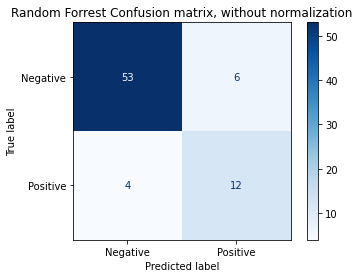

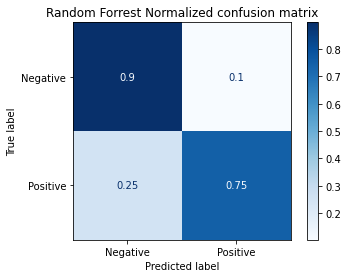

In [11]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Random Forrest Confusion matrix, without normalization", None),
                  ("Random Forrest Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Logistic Regression:

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [13]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [14]:
LRA = (classifier.score(X_test, y_test) * 100)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

LRA

Training Data Score: 0.8169642857142857
Testing Data Score: 0.8666666666666667


86.66666666666667

In [15]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 1 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [16]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
70,0,1
71,0,0
72,0,0
73,0,0


Logistic Regression Confusion matrix, without normalization
[[53  6]
 [ 4 12]]
Logistic Regression Normalized confusion matrix
[[0.9  0.1 ]
 [0.25 0.75]]


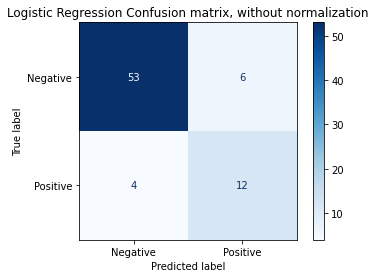

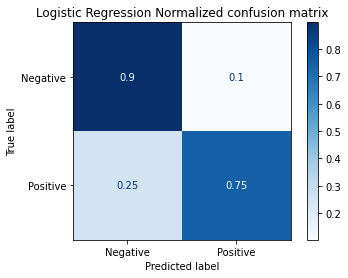

In [17]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Logistic Regression Confusion matrix, without normalization", None),
                  ("Logistic Regression Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


# Support Vector Machine:

In [18]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
svc = model.fit(X_train, y_train)

In [19]:
print('Test Acc: %.3f' % svc.score(X_test, y_test))

SVMA = (svc.score(X_test, y_test) * 100)
SVMA

Test Acc: 0.893


89.33333333333333

In [20]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.93      0.93      0.93        59
    Positive       0.75      0.75      0.75        16

    accuracy                           0.89        75
   macro avg       0.84      0.84      0.84        75
weighted avg       0.89      0.89      0.89        75



Support Vector Machine Confusion matrix, without normalization
[[55  4]
 [ 4 12]]
Support Vector Machine Normalized confusion matrix
[[0.93 0.07]
 [0.25 0.75]]


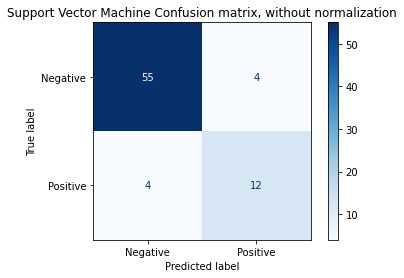

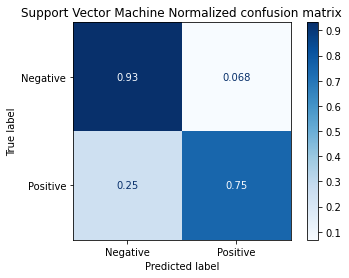

In [21]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Support Vector Machine Confusion matrix, without normalization", None),
                  ("Support Vector Machine Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# OneHot Encoding:

In [22]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

# Scaling the Data:

In [23]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [24]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# K Nearest Neighbors:

In [25]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.693
k: 3, Train/Test Score: 0.821/0.707
k: 5, Train/Test Score: 0.808/0.840
k: 7, Train/Test Score: 0.768/0.853
k: 9, Train/Test Score: 0.777/0.853
k: 11, Train/Test Score: 0.772/0.840
k: 13, Train/Test Score: 0.772/0.840
k: 15, Train/Test Score: 0.777/0.787
k: 17, Train/Test Score: 0.754/0.787
k: 19, Train/Test Score: 0.768/0.787
k: 21, Train/Test Score: 0.768/0.800
k: 23, Train/Test Score: 0.759/0.787
k: 25, Train/Test Score: 0.737/0.800
k: 27, Train/Test Score: 0.737/0.800
k: 29, Train/Test Score: 0.732/0.800
k: 31, Train/Test Score: 0.728/0.800
k: 33, Train/Test Score: 0.728/0.827
k: 35, Train/Test Score: 0.719/0.800
k: 37, Train/Test Score: 0.714/0.813
k: 39, Train/Test Score: 0.705/0.813


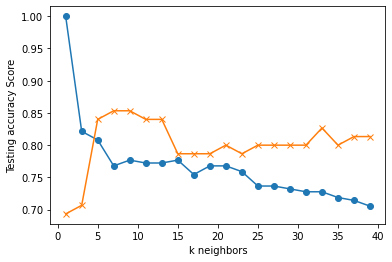

In [26]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [27]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))
KNNA = (knn.score(X_test_scaled, y_test) * 100)

k=9 Test Acc: 0.853


# Neural Network:

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=24, activation='relu', input_dim=12))
model.add(Dense(units=2, activation='softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                312       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 50        
Total params: 362
Trainable params: 362
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 224 samples
Epoch 1/100
224/224 - 1s - loss: 0.7139 - accuracy: 0.5536
Epoch 2/100
224/224 - 0s - loss: 0.6880 - accuracy: 0.5982
Epoch 3/100
224/224 - 0s - loss: 0.6645 - accuracy: 0.6116
Epoch 4/100
224/224 - 0s - loss: 0.6439 - accuracy: 0.6295
Epoch 5/100
224/224 - 0s - loss: 0.6233 - accuracy: 0.6607
Epoch 6/100
224/224 - 0s - loss: 0.6055 - accuracy: 0.6830
Epoch 7/100
224/224 - 0s - loss: 0.5895 - accuracy: 0.7054
Epoch 8/100
224/224 - 0s - loss: 0.5744 - accuracy: 0.7232
Epoch 9/100
224/224 - 0s - loss: 0.5597 - accuracy: 0.7411
Epoch 10/100
224/224 - 0s - loss: 0.5475 - accuracy: 0.7589
Epoch 11/100
224/224 - 0s - loss: 0.5355 - accuracy: 0.7679
Epoch 12/100
224/224 - 0s - loss: 0.5240 - accuracy: 0.7723
Epoch 13/100
224/224 - 0s - loss: 0.5134 - accuracy: 0.7812
Epoch 14/100
224/224 - 0s - loss: 0.5040 - accuracy: 0.7902
Epoch 15/100
224/224 - 0s - loss: 0.4942 - accuracy: 0.8080
Epoch 16/100
224/224 - 0s - loss: 0.4857 - accuracy: 0.8170
Epoch 17/100
224/224 - 0s - 

# Deep Learning:

In [34]:
deep_model = Sequential()
deep_model.add(Dense(units=24, activation='relu', input_dim=12))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [35]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 224 samples
Epoch 1/100
224/224 - 1s - loss: 0.8984 - accuracy: 0.4018
Epoch 2/100
224/224 - 0s - loss: 0.8275 - accuracy: 0.4866
Epoch 3/100
224/224 - 0s - loss: 0.7755 - accuracy: 0.5491
Epoch 4/100
224/224 - 0s - loss: 0.7351 - accuracy: 0.5714
Epoch 5/100
224/224 - 0s - loss: 0.7025 - accuracy: 0.6116
Epoch 6/100
224/224 - 0s - loss: 0.6765 - accuracy: 0.6339
Epoch 7/100
224/224 - 0s - loss: 0.6512 - accuracy: 0.6607
Epoch 8/100
224/224 - 0s - loss: 0.6299 - accuracy: 0.6830
Epoch 9/100
224/224 - 0s - loss: 0.6119 - accuracy: 0.7009
Epoch 10/100
224/224 - 0s - loss: 0.5950 - accuracy: 0.7188
Epoch 11/100
224/224 - 0s - loss: 0.5798 - accuracy: 0.7277
Epoch 12/100
224/224 - 0s - loss: 0.5656 - accuracy: 0.7321
Epoch 13/100
224/224 - 0s - loss: 0.5517 - accuracy: 0.7411
Epoch 14/100
224/224 - 0s - loss: 0.5387 - accuracy: 0.7634
Epoch 15/100
224/224 - 0s - loss: 0.5258 - accuracy: 0.7679
Epoch 16/100
224/224 - 0s - loss: 0.5134 - accuracy: 0.7812
Epoch 17/100
224/224 - 0s - 

In [36]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

NNA = (model_accuracy * 100)
NNA

75/75 - 0s - loss: 0.4153 - accuracy: 0.8400
Normal Neural Network - Loss: 0.41531011899312337, Accuracy: 0.8399999737739563


83.99999737739563

In [37]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")
DLA = (model_accuracy * 100)

75/75 - 0s - loss: 0.6036 - accuracy: 0.8133
Deep Neural Network - Loss: 0.6035779110590617, Accuracy: 0.8133333325386047


# Cluster Analysis

In [38]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler().fit(data)

In [39]:
data_scaled = data_scaler.transform(data)
# X_test_scaled = data_scaler.transform(X_test)

In [40]:
# Create a kmeans model using k = 12
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

# Fit the model to the data
kmeans.fit(data_scaled)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(data_scaled)

data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285


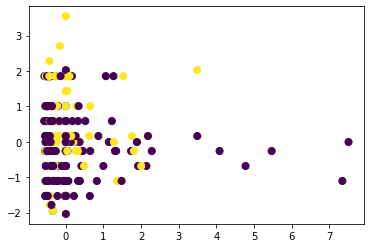

In [41]:
# Plot the clusters
plt.scatter(data_scaled[:, 2], data_scaled[:, 4], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [42]:
# Print the cluster centers and cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=1)

plt.show()

NameError: name 'X' is not defined

# Model Accuracy:

In [61]:
LRA = round((classifier.score(X_test, y_test) * 100),2)
DTA = round((clf.score(X_test, y_test) * 100),2)
RFA = round((rf.score(X_test, y_test) * 100),2)
SVMA = round((svc.score(X_test, y_test) * 100),2)
KNNA = round((knn.score(X_test_scaled, y_test) * 100),2)
NNA = round((model_accuracy * 100),2)
DLA = round((model_accuracy * 100),2)


In [62]:
Accuracy_df = pd.DataFrame({"ML_Model":["Decision Tree","Random Forrest","Logistical Regression","Decision Tree","K Nearest Neighbors","Neural Network","Deep Learning"],
                            "Accuracy":[DTA, RFA, LRA, SVMA, KNNA, NNA, DLA]                       
                             })

Accuracy_df


# pharaoh_df = pd.DataFrame(
#     {"Dynasty": ["Early Dynastic Period", "Old Kingdom"],
#      "Pharaoh": ["Thinis", "Memphis"]
#      }
# )
# pharaoh_df

,ML_Model,Accuracy
0,Decision Tree,82.67
1,Random Forrest,86.67
2,Logistical Regression,86.67
3,Decision Tree,89.33
4,K Nearest Neighbors,85.33
5,Neural Network,81.33
6,Deep Learning,81.33


<AxesSubplot:>

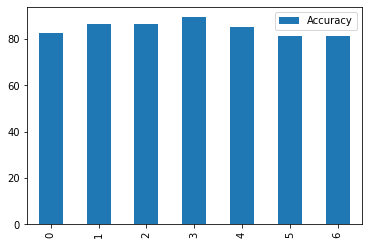

In [66]:
Accuracy_df.plot(kind="bar")

In [67]:
Accuracy_df.to_csv('out.zip',index=False)

'ML_Model,Accuracy\r\nDecision Tree,82.67\r\nRandom Forrest,86.67\r\nLogistical Regression,86.67\r\nDecision Tree,89.33\r\nK Nearest Neighbors,85.33\r\nNeural Network,81.33\r\nDeep Learning,81.33\r\n'